# Workshop 5

In this workshop you will learn about confidence intervals, whereafter you and your group should discuss what you have learned during the quantitative introduction workshops. In the last 45-60 minutes of the workshop, we will discuss the workshops' contents in the class and you can ask me and/or classmates questions, which you think could be of common interest to the class.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import seaborn as sb
import matplotlib.pyplot as plt
pd.set_option('precision', 2)
%precision 2

'%.2f'

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/AsgerAndersen/basecamp_stats_intro/master/origin_mobility.csv')

# Confidence intervals

In the last workshop, we learned that when we fit our model on a random sample of the population, the randomness of the sample is transferred to the model's parameters in the sense that if chance had handed us another random sample then the values of the estimated parameters would have been somewhat different. If we have a sufficiently large sample, the estimated parameters will normally be close to their corresponding population parameters, but they can also be far apart, if we have got an unlucky sample. The problem is that we only know our actual sample - not the underlying sampled population. 

The idea behind an estimated parameter's confidence interval is to acknowledge this uncertainty by reporting the value of the estimated parameter together with an interval of values. The interval is supposed to be a good guess on the approximate whereabouts of the estimated parameter's corresponding population parameter. The more uncertain we are about how close the estimated parameter is to the population parameter, the wider the confidence interval should be.

Let's go back to the example, where a team of researchers have randomly sampled 20 commuting zones and estimated a linear regression model with mobility as *outcome* and *german* as predictor:

<p style="text-align: center;"> $m(g) = \beta_0 + \beta_1 \cdot g$ </p>

The resulting linear model looks like this:

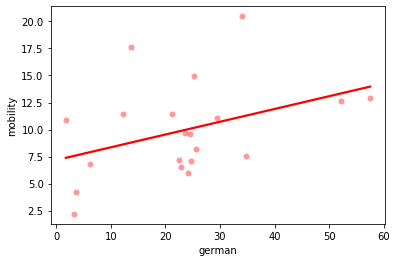

In [8]:
data_sample = data.sample(n=20,random_state=2238)
sb.regplot('german','mobility',data=data_sample,color='red',ci=False,scatter_kws={'alpha':0.4,'linewidth':0});

Let $\hat{\beta}_1$ denote the estimated value of $\beta_1$, that is: The value of $\beta_1$, when the linear regression model is fitted on the researchers' particular sample. In our example, we have that $\hat{\beta}_1=0.12$, as can be seen below:

In [14]:
mob_ger = sm.ols('mobility~german',data=data_sample).fit()
mob_ger.params

Intercept    7.18
german       0.12
dtype: float64

We learned in the last workshop that the standard error of $\hat{\beta}_1$ is the standard deviation of its sampling distribution. We denote the standard error of $\hat{\beta}_1$ by $SE(\hat{\beta}_1)$. We also learned in the last workshop that $SE(\hat{\beta})$ is supposed to measure the uncertainty of the estimated parameter value that results from the fact the model is fitted on a sample and not the full sampled population. The researchers cannot observe the value of $SE(\hat{\beta}_1)$, because they cannot observe the sampling distribution, since they don't have access to an infinite amount of samples, but only to their particular sample. Therefore, they have to use their particular sample to estimate the shape of the sampling distribution and thereby also estimate the $SE(\hat{\beta}_1)$. We learned that they can do this by bootstrapping or by using the Central Limit Theorem. Regardless of the chosen method, let the estimated standard error be denoted by $\hat{SE}(\hat{\beta}_1)$, and say that the researchers have used bootstrapping to get the estimate $\hat{SE}(\hat{\beta}_1)=0.06$ (this is the value, which we got from using bootstrapping in the last workshop).

A very common way of constructing a confidence interval - at a so-called confidence level of 95% - for a parameter $\beta_1$ is to use the following formula (this is not the only way, but we will not learn about other ways in this workshop):

<p style="text-align: center;"> $CI(\beta_1) = \hat{\beta}_1 \pm 1.96 \cdot \hat{SE}(\hat{\beta}_1)$ </p>

That is, we get the lower bound of the interval by substracting $1.96 \cdot \hat{SE}(\hat{\beta}_1)$ from the estimated parameter value $\hat{\beta}_1$, and we get the upper bound of the interval by adding $1.96 \cdot \hat{SE}(\hat{\beta}_1)$ to the estimated parameter value $\hat{\beta}_1$.

From now on, when I refer to an estimated parameter's confidence interval, I refer to the confidence interval at a 95% confidence level, unless I explicitly say otherwise. You will learn more below about how to understand the confidence level of a confidence interval.

**Exercise 5.1:** In our example, we have seen that $\hat{\beta}_1 = 0.12$ and $\hat{SE}(\hat{\beta}_1)=0.06$. What is the confidence interval of $\beta_1$? What would the confidence interval had been, if $\hat{\beta}_1 = 0.2$ and $\hat{SE}(\hat{\beta}_1)=0.06$? What about, if  $\hat{\beta}_1 = 0.12$ and $\hat{SE}(\hat{\beta}_1)=0.02$?

**Answer 5.1:**

**Exercise 5.2:** Look at the formula for the confidence interval. Does the width of the interval increase or decrease, when the estimated standard error of the parameter increases?

**Answer 5.2:**

**Exercise 5.3:** The width of the confidence interval increases, when the estimated standard error increases. Why would you say that this makes sense in relation to what you have learned about the purpose of an estimated parameter's confidence interval and standard error?

**Answer 5.3:**

Since $\hat{\beta}_1$ and $\hat{SE}(\hat{\beta}_1)$ is calculated from the actual sample, the confidence interval of $\beta_1$ is also calculated from the actual sample. This is good, because the researchers only have access to their actual sample, not the entire population. However, it also means that the confidence interval would be a bit different, if chance had handed the researchers a different random sample. The definition of a confidence interval of a parameter at a *confidence level of 95%* is that, if we drew an infinite number of random samples and calculated the parameter's confidence interval on each of them, then at least 95% of the resulting intervals should contain the population value of the parameter. In general, the confidence interval of a parameter at a *confidence level of p percent* should contain the population parameter at least *p* percent of the time, if we drew an infinite number of random samples and calculated the parameter's confidence interval on each of them. As you see, the confidence interval is a quite abstract and confusing construction. One way to think about it in more concrete terms is that if all studies around the globe are using 95% confidence intervals, when reporting estimated parameters, then the corresponding population parameters will lie inside 95% of these intervals. However, we have no - purely statistical - way of knowing if the population parameter lies inside any particular reported confidence interval, or if this particular interval is one of the 5%, which does not contain the population parameter. This interpretation will not be strictly true in the real world for many reasons, e.g. that a sizable amount of real-world-studies do not strictly satisfy the statistical assumptions which their confidence intervals are built upon. However, even if this interpretation only holds approximately (maybe the population parameters only lies inside 90% of the reported 95% confidence intervals), it still constitutes one concrete way to motivate the use of confidence intervals.

We won't go into further details with how to interpret confidence intervals. What is important to know for now is that:
* Confidence intervals are one particular tool for quantifying and handling sampling uncertainty in an estimated parameters. In this regard, they are like standard errors. The difference is that whereas an estimated parameter's standard error have no clear interpretation in relation to the population parameter, a confidence interval can be interpreted as a guess on the approximate whereabouts of the population parameter. The guess incorporates sampling uncertainty by making the interval wider, the larger the standard error is. This, for instance, implies that a larger sample size results in a narrower confidence interval, since an increase in sample size decreases the standard error.
* The more technical interpretation of a confidence interval at a *p* percent confidence level is that, if the researchers repeated their research process with new random samples an infinite number of times, then the confidence interval should contain the population parameter *p* percent of the times. However, this DOES NOT MEAN that with *p* percent probability the population parameter lies within any particular interval - this interpretation is common even among many scientists, but it is wrong.
* Don't take confidence intervals too seriously on their own!!! They should be treated as a small part of a larger research process, which includes expert domain knowlegde and common sense, not just statistical calculations. Be skeptical of confidence intervals: The particalur 95% confidence interval, you are looking at, might be one of the 5%, where the population parameter is lying outside the interval. You need expert domain knowledge and common sense to think about whether the values in the confidence interval make sense compared to your expectations (This kind of reasoning is formalized by [Bayesian Statistics](https://en.wikipedia.org/wiki/Bayesian_statistics), so you can check that approach out if your interested. I personally find that a Bayesian approach to probability and statistics has much to offer compared to the [Frequentist](https://en.wikipedia.org/wiki/Frequentist_probability) approach. However, the Frequentist approach is the default approach in most quantitative social science research, and therefore I have also used this approach's perspective to explain sampling distributions, standard errors and confidence intervals in workshop 4 and 5).

**Exercise 5.4:** In the formula

<p style="text-align: center;"> $CI(\beta_1) = \hat{\beta}_1 \pm 1.96 \cdot \hat{SE}(\hat{\beta}_1)$ </p>


the number 1.96 results from the fact that we want a 95% confidence interval (see also the *note* below). 

If we instead wanted to construct a 90% confidence interval, the formula would look like this:

<p style="text-align: center;"> $CI(\beta_1) = \hat{\beta}_1 \pm 1.64 \cdot \hat{SE}(\hat{\beta}_1)$ </p>

and if we wanted a 99% confidence interval, the formula would look like this:

<p style="text-align: center;"> $CI(\beta_1) = \hat{\beta}_1 \pm 2.58 \cdot \hat{SE}(\hat{\beta}_1)$ </p>

In general, if we want a confidence interval with a larger confidence level, we have to multiply the standard error by a larger number. This implies that the confidence interval gets wider, the larger a confidence level we want. Why would you say that this makes sense given what you have learned about the meaning of a confidence interval's confidence level?

*Note:* The number is also based on an assumption that the sampling distribution of $\hat{\beta_1}$ is a [normal distribution](https://www.youtube.com/watch?v=rzFX5NWojp0&ab_channel=StatQuestwithJoshStarmer) with the population parameter $\beta_1$ as its mean and estimated standard error $\hat{SE}(\hat{\beta}_1)$ as its standard deviation. This assumption is often reasonable due to the [Central Limit Theorem](https://www.youtube.com/watch?v=YAlJCEDH2uY&ab_channel=StatQuestwithJoshStarmer). Don't worry if you don't understand any of this. It is not necessary knowledge, but I am mentioning it for those of who you are interested in understanding more about the statistical details of constructing confidence intervals, so you have a better foundation for doing some self studying

**Answer 5.4:**

**Exercise 5.5:** Discuss what you have learned about confidence intervals. What is the purpose of confidence intervals? What is the relationship between an estimated parameter's standard error and its confidence interval? What is the accurate interpretation of a confidence interval at a 95% confidence level? Do you have some ideas about why it is not correct to say that a 95% confidence interval contains the population parameter with 95% probability?

**Answer 5.5:**

# Recap

Start by individually answering [this survey](https://docs.google.com/forms/d/1dV2Ao573x3Zg9H3PxAqm64aU2ujfvaZDdXOaxrNTjR0/edit) (< 1 minute) about what subjects you find most important to review in class.

Please discuss the contents of the quantitative workshops with your group. What overall concepts and methods have you learned about? What are the methods trying to accomplish? How are the methods performed? How are they useful? What are they not useful for? What concepts and methods did you find difficult to understand? Why do you think that you found them difficult to understand?

Find at least one questions that you would like to ask me and/or the class in the discussion section.

If you have more time, then finish unfinished exercises from the last workshops, including the extra exercises.